# Sentiment Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Raw Data

First let's look at some of the raw data labelled by both human classifiers and Chat-GPT.

In [2]:
# One of the datasets labelled both by human classifiers and chat-gpt
fin_phrasebank = pd.read_csv('../../data/classified-data/financial_phrasebank.csv')
fin_phrasebank = fin_phrasebank[['Headlines','Manual Sentiment', 'GPT Sentiment', 'FinRoberta Sentiment']]

aspect_analysis = pd.read_csv('../../data/classified-data/aspect_based_analysis.csv')
aspect_analysis = aspect_analysis[['Headlines','Manual Sentiment', 'GPT Sentiment', 'FinRoberta Sentiment']]

raw_df = pd.concat([fin_phrasebank, aspect_analysis], ignore_index=True)
raw_df.sample(5)

,Headlines,Manual Sentiment,GPT Sentiment,FinRoberta Sentiment
10692,"NTPC pays Rs 4,742 crore dividend for 2013-14",Neutral,Positive,Neutral
12755,"Nikkei rises on Federal Reserve view, industri...",Positive,Positive,Positive
3854,The operations to be sold include manufacturin...,Neutral,Neutral,Neutral
12683,"Jaypee, Reliance Group stocks in focus ahead o...",Positive,Neutral,Neutral
7049,Ceat shares up over 4% after workers call off ...,Positive,Positive,Positive


In [3]:
# Get percentage of rows classified the same by both human and chat-gpt
gpt_performance = raw_df[raw_df['GPT Sentiment'] == raw_df['Manual Sentiment']].shape[0] / raw_df.shape[0]
finroberta_performance = raw_df[raw_df['FinRoberta Sentiment'] == raw_df['Manual Sentiment']].shape[0] / raw_df.shape[0]

print(f'GPT performance: {gpt_performance:.2%}')
print(f'FinRoberta performance: {finroberta_performance:.2%}')

GPT performance: 80.12%
FinRoberta performance: 78.31%


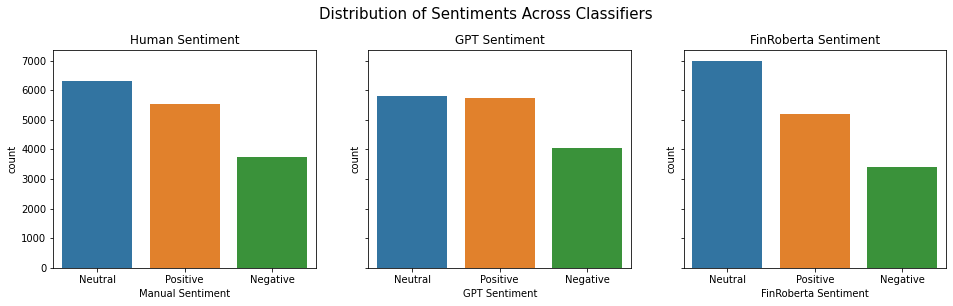

In [4]:
# Plot the distribution of sentiments for each classifier
order = ['Neutral', 'Positive', 'Negative']
fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharey=True)
sns.countplot(ax=axes[0], x='Manual Sentiment', data=raw_df, order=order)
sns.countplot(ax=axes[1], x='GPT Sentiment', data=raw_df, order=order)
sns.countplot(ax=axes[2], x='FinRoberta Sentiment', data=raw_df, order=order)
axes[0].set_title('Human Sentiment')
axes[1].set_title('GPT Sentiment')
axes[2].set_title('FinRoberta Sentiment')
plt.suptitle("Distribution of Sentiments Across Classifiers", fontsize=15, y=1.03)
plt.show()

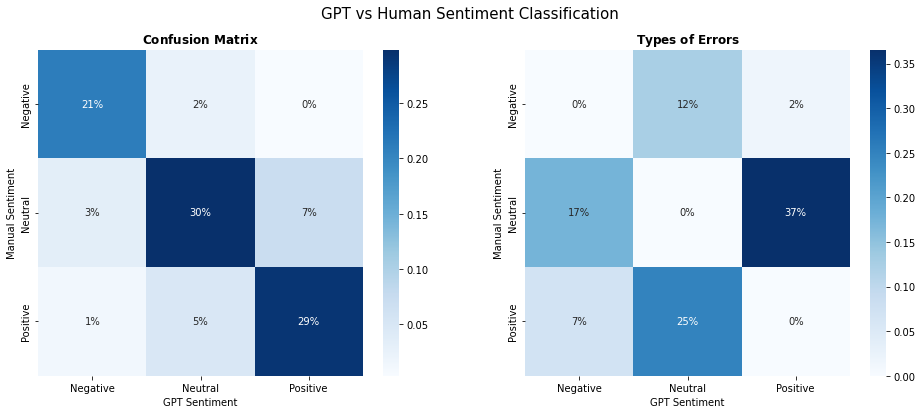

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

conf_mat = pd.crosstab(raw_df['Manual Sentiment'], raw_df['GPT Sentiment'])
sns.heatmap(conf_mat / conf_mat.sum().sum(), ax=axes[0], annot=True, fmt='.0%', cmap='Blues')
axes[0].set_title('$\\bf{Confusion\,\,Matrix}$')

error_rates = conf_mat.copy()
for i in range(len(error_rates)):
    error_rates.iloc[i,i] = 0
sns.heatmap(error_rates / error_rates.sum().sum(), ax=axes[1], annot=True, fmt='.0%', cmap='Blues')
axes[1].set_title('$\\bf{Types\,\,of\,\,Errors}$')

plt.suptitle('GPT vs Human Sentiment Classification', fontsize=15, y=0.98)
plt.show()

In [6]:
pos_neu = raw_df[(raw_df['Manual Sentiment'] == 'Positive') & (raw_df['GPT Sentiment'] == 'Neutral')]
pos_neu = pos_neu['Headlines'].sample(7).values.tolist()
print('\033[1m' + 'Human sentiment: Positive, GPT sentiment: Neutral' + '\033[0m')
for row in pos_neu:
    print(f'  "{row}"')
print()

neu_pos = raw_df[(raw_df['Manual Sentiment'] == 'Neutral') & (raw_df['GPT Sentiment'] == 'Positive')]
neu_pos = neu_pos['Headlines'].sample(7).values.tolist()
print('\033[1m' + 'Human sentiment: Neutral, GPT sentiment: Positive' + '\033[0m')
for row in neu_pos:
    print(f'  "{row}"')

Human sentiment: Positive, GPT sentiment: Neutral
  "NTPC, Bangladesh to sign MoU for 2 new projects of 1320 mw each: R S Sharma"
  "In addition the deal includes a call option which will enable Maritim Food AS to increase its holding in Sandanger AS to 51 % in the future."
  "World stocks hold at all-hit time after bumper week"
  "Bull's Eye: Rolta India, Yes Bank, PFC, Ambuja Cement, Apollo Hospitals"
  "Tokyo shares inch higher at close after two days of losses"
  "However, the total orders received will still be above last year s levels."
  "Asia stocks stall after Wall Street slips, dollar holds gains"

Human sentiment: Neutral, GPT sentiment: Positive
  "The second variant offers complete final finishing of any selected apartment with foreign high quality materials ( Finland, Denmark, Germany, France )."
  "GeoSentric is acquiring extra financing by issuing a maximum of 220,000 new shares and a convertible bond with subscription rights for 880,000 shares, which have been fully su

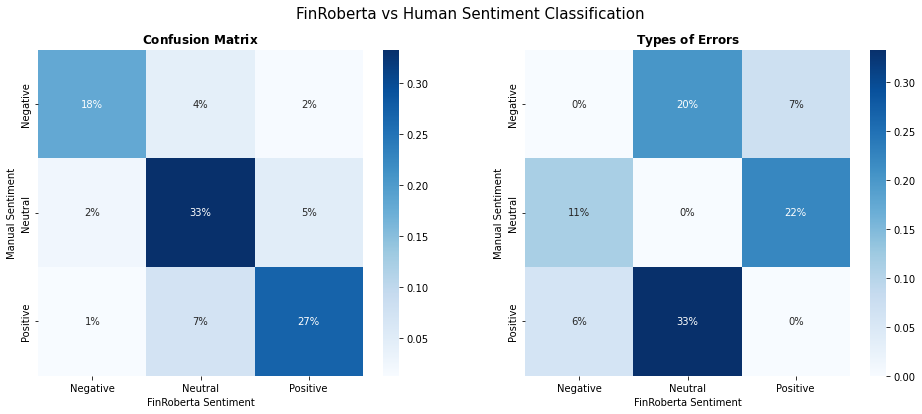

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

conf_mat = pd.crosstab(raw_df['Manual Sentiment'], raw_df['FinRoberta Sentiment'])
sns.heatmap(conf_mat / conf_mat.sum().sum(), ax=axes[0], annot=True, fmt='.0%', cmap='Blues')
axes[0].set_title('$\\bf{Confusion\,\,Matrix}$')

error_rates = conf_mat.copy()
for i in range(len(error_rates)):
    error_rates.iloc[i,i] = 0
sns.heatmap(error_rates / error_rates.sum().sum(), ax=axes[1], annot=True, fmt='.0%', cmap='Blues')
axes[1].set_title('$\\bf{Types\,\,of\,\,Errors}$')

plt.suptitle('FinRoberta vs Human Sentiment Classification', fontsize=15, y=0.98)
plt.show()

In [8]:
pos_neu = raw_df[(raw_df['Manual Sentiment'] == 'Positive') & (raw_df['FinRoberta Sentiment'] == 'Neutral')]
pos_neu = pos_neu['Headlines'].sample(7).values.tolist()
print('\033[1m' + 'Human sentiment: Positive, FinRoberta sentiment: Neutral' + '\033[0m')
for row in pos_neu:
    print(f'  "{row}"')
print()

neu_pos = raw_df[(raw_df['Manual Sentiment'] == 'Neutral') & (raw_df['FinRoberta Sentiment'] == 'Positive')]
neu_pos = neu_pos['Headlines'].sample(7).values.tolist()
print('\033[1m' + 'Human sentiment: Neutral, FinRoberta sentiment: Positive' + '\033[0m')
for row in neu_pos:
    print(f'  "{row}"')

Human sentiment: Positive, FinRoberta sentiment: Neutral
  "Patni Computers zooms 8 pc on stake sale buzz"
  "No reason to shy away from buying ITC because of excise duty hike: Mehraboon Irani, Nirmal Bang Securities"
  "Traders can build fresh long in United Phosphorous: Religare"
  "Pre-election rally likely; Nifty may touch 6500 level: Ambareesh Baliga"
  "JSPL, Monnet & NIIT Tech; three stocks that stole the show"
  "Punters make a killing in Geometric"
  "SC judgment neutral for telecom majors, Bharti top pick: Analysts"

Human sentiment: Neutral, FinRoberta sentiment: Positive
  "Grasim looks good but range of growth not much: Sudip Bandyopadhyay"
  "FTSE adds 9 Indian firms to key Asia Pacific index"
  "Market might see breakout if Bank Nifty gets past 15,550: Mitesh Thacker"
  "British markets breathe sigh of relief as Scotland votes "No"
  "Nomura retains its 'Hold' rating on ONGC"
  "Timex posts Q4 net profit at Rs 2.47 crore"
  "On the route between Helsinki in Finland and T

In [9]:
agree_df = raw_df[raw_df['GPT Sentiment'] == raw_df[ 'FinRoberta Sentiment']]
agree_df = agree_df.rename(columns={'GPT Sentiment': 'Sentiment'})
perf = agree_df[agree_df['Sentiment'] == agree_df['Manual Sentiment']].shape[0] / agree_df.shape[0]

print(f'Percentage of cases where models agree: {agree_df.shape[0] / raw_df.shape[0]:.2%}')
print(f'Performance when models agree: {perf:.2%}')

Percentage of cases where models agree: 74.50%
Performance when models agree: 89.98%


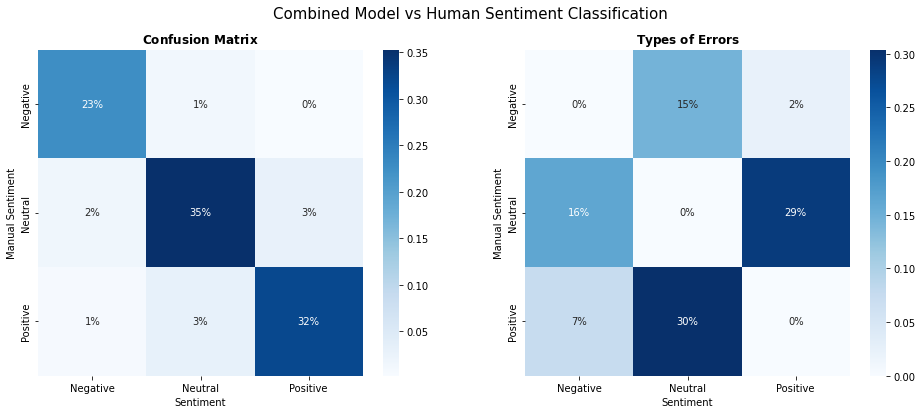

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

conf_mat = pd.crosstab(agree_df['Manual Sentiment'], agree_df['Sentiment'])
sns.heatmap(conf_mat / conf_mat.sum().sum(), ax=axes[0], annot=True, fmt='.0%', cmap='Blues')
axes[0].set_title('$\\bf{Confusion\,\,Matrix}$')

error_rates = conf_mat.copy()
for i in range(len(error_rates)):
    error_rates.iloc[i,i] = 0
sns.heatmap(error_rates / error_rates.sum().sum(), ax=axes[1], annot=True, fmt='.0%', cmap='Blues')
axes[1].set_title('$\\bf{Types\,\,of\,\,Errors}$')

plt.suptitle('Combined Model vs Human Sentiment Classification', fontsize=15, y=0.98)
plt.show()

In [11]:
disagree_df = raw_df[raw_df['GPT Sentiment'] != raw_df['FinRoberta Sentiment']]
disagree_df = disagree_df[['Headlines', 'GPT Sentiment', 'FinRoberta Sentiment', 'Manual Sentiment']]
gpt_perf = (disagree_df[disagree_df['GPT Sentiment'] == disagree_df['Manual Sentiment']].shape[0] / 
            disagree_df.shape[0])
finroberta_perf = (disagree_df[disagree_df['FinRoberta Sentiment'] == disagree_df['Manual Sentiment']].shape[0] / 
                   disagree_df.shape[0])

print(f'GPT performance when models disagree: {gpt_perf:.2%}')
print(f'FinRoberta performance when models disagree: {finroberta_perf:.2%}')

GPT performance when models disagree: 51.32%
FinRoberta performance when models disagree: 44.23%


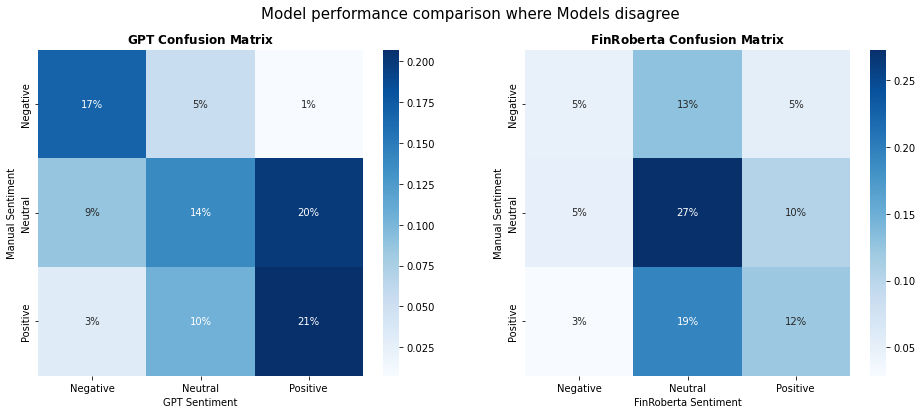

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

conf_mat = pd.crosstab(disagree_df['Manual Sentiment'], disagree_df['GPT Sentiment'])
sns.heatmap(conf_mat / conf_mat.sum().sum(), ax=axes[0], annot=True, fmt='.0%', cmap='Blues')
axes[0].set_title('$\\bf{GPT\,\,Confusion\,\,Matrix}$')

conf_mat = pd.crosstab(disagree_df['Manual Sentiment'], disagree_df['FinRoberta Sentiment'])
sns.heatmap(conf_mat / conf_mat.sum().sum(), ax=axes[1], annot=True, fmt='.0%', cmap='Blues')
axes[1].set_title('$\\bf{FinRoberta\,\,Confusion\,\,Matrix}$')

plt.suptitle('Model performance comparison where Models disagree', fontsize=15, y=0.98)
plt.show()

In [13]:
print('\033[1m' + 'Headlines where models disagree (Human/GPT/FinRoberta):' + '\033[0m')
for row in disagree_df.sample(8).values.tolist():
    print(f'  ({row[3]}/{row[1]}/{row[2]})\t"{row[0]}"')

Headlines where models disagree (Human/GPT/FinRoberta):
  (Negative/Neutral/Negative)	"ADAG stocks are going to volatile: Sangeeta Purushottam"
  (Negative/Negative/Neutral)	"Nestle falls as government sues company over Maggi row; seeks Rs 640 crore in damages"
  (Negative/Neutral/Positive)	"IDEA: Subscribers growth fails to boost numbers"
  (Positive/Positive/Neutral)	"DLF, Unitech top picks in real estate: Jitendra Mehta,  Edelweiss"
  (Positive/Positive/Neutral)	"Market is getting ready for a big move: Ashwani Gujral"
  (Negative/Neutral/Negative)	"have notified that as a result of the Company issuing 14,432,000 new shares in the directed offering, the joint holdings of Pequot has decreased below 1-10 to 9.63 % of total number of shares and votes in the Company."
  (Positive/Neutral/Negative)	"Bond investors factor in rate cut, yields head lower"
  (Neutral/Neutral/Negative)	"US stocks: Wall Street ends first day of 2015 flat"


### Findings

- Both models exhibit similar performance, with approximately 80% accuracy compared to human annotations.
- The primary disagreement between human annotations and Chat-GPT occurs in distinguishing between neutral 
and positive sentiments.
    - Upon manual inspection it is not clear which is correct.
- FinRoberta has a tendency to over-classify instances as neutral.
- When human annotations and FinRoberta disagree, it is often due to FinRoberta misclassifying instances.
- By combining the outputs of both models, we can eliminate about 25% of the data and achieve 90% 
accuracy on the remaining data.
- For instances where the models disagree, the performance of both models drops to 45-50% accuracy.

## Test set

In [14]:
test = pd.read_csv('../../data/fixed-data/sentiment-test.csv')
test.head()

,Headlines,Sentiment
0,textile stocks likely to remain under pressure...,Negative
1,ambuja a good bet in the cement space buy at l...,Positive
2,scores sebi s complaint redressal system,Neutral
3,pre-market nifty likely to hit fresh record hi...,Positive
4,soaring psu shares spark pricing worry,Negative


In [15]:
# Class distribution
print(test.groupby('Sentiment')['Headlines'].count() / len(test))

Sentiment
Negative    0.300146
Neutral     0.317326
Positive    0.382528
Name: Headlines, dtype: float64


## Train set

In [16]:
train = pd.read_csv('../../data/fixed-data/sentiment-train.csv')
val = pd.read_csv('../../data/fixed-data/sentiment-val.csv')
train = pd.concat([train, val], ignore_index=True)
print(train.groupby('Sentiment')['Headlines'].count() / len(train))

Sentiment
Negative    0.250056
Neutral     0.472739
Positive    0.277204
Name: Headlines, dtype: float64


In [17]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443352 entries, 0 to 443351
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Headlines  443352 non-null  object
 1   Sentiment  443352 non-null  object
dtypes: object(2)
memory usage: 6.8+ MB


,Headlines,Sentiment
count,443352,443352
unique,443352,3
top,china wins 100 orders for first jetliner,Neutral
freq,1,209590


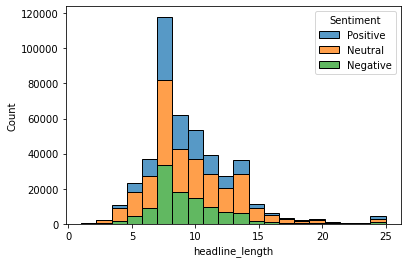

In [18]:
train['headline_length'] = train['Headlines'].astype(str).apply(lambda x: min(len(x.split()), 25))
sns.histplot(data=train, x='headline_length', hue='Sentiment', multiple='stack', bins=20)
plt.show()

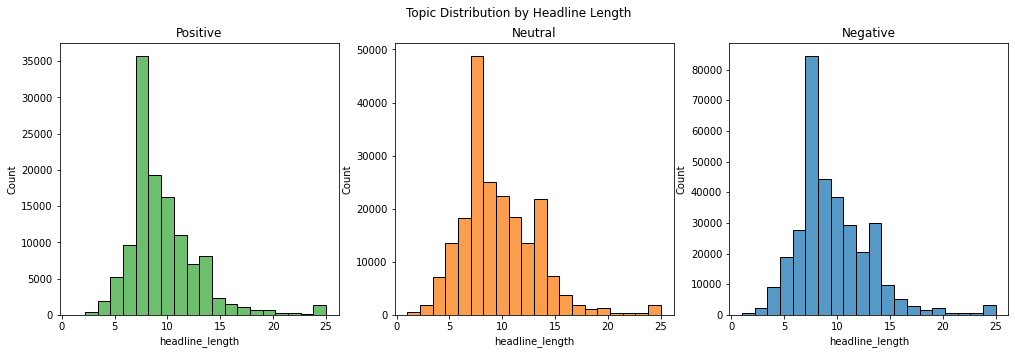

In [19]:
fig, axes = plt.subplots(ncols=3, figsize=(17, 5))
positive = train[train['Sentiment'] == 'Positive']
neutral = train[train['Sentiment'] == 'Neutral']
negative = train[train['Sentiment'] != 'Negative']

sns.histplot(data=positive, x='headline_length', color='#3ca83c', multiple='stack',
             bins=20, ax=axes[0])
sns.histplot(data=neutral, x='headline_length', color='#f97d11', multiple='stack',
             bins=20, ax=axes[1])
sns.histplot(data=negative, x='headline_length', multiple='stack',
             bins=20, ax=axes[2])

fig.suptitle('Topic Distribution by Headline Length')
axes[0].set_title('Positive')
axes[1].set_title('Neutral') 
axes[2].set_title('Negative')
plt.show()

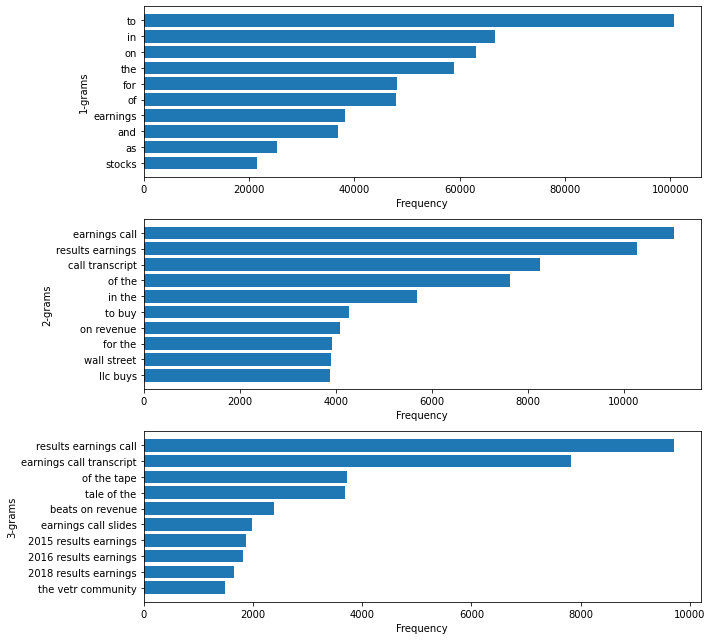

In [20]:
from sklearn.feature_extraction.text import CountVectorizer


def get_ngrams(corpus, ngrams=1, relative=False):
    """Get all n-grams from a corpus of text.
    
    Args:
        corpus: A list of strings representing the text documents.
        ngrams: The size of the n-grams to be extracted (default: 1).
        relative: If True, returns relative frequencies (default: False).
    
    Returns:
        A tuple containing two lists: n-gram words and their corresponding frequencies.
    """
    vec = CountVectorizer(ngram_range=(ngrams, ngrams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    words, frequencies = zip(*words_freq)
    if relative:
        frequencies = frequencies / np.sum(frequencies)
    return words, frequencies


def plot_top_ngrams(ax, corpus, ngrams=1, top_k=10):
    """Plot the top k n-grams from a corpus of text."""
    words, frequencies = get_ngrams(corpus, ngrams=ngrams)
    words, frequencies = words[:top_k], frequencies[:top_k]
    ax.barh(words, frequencies)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency')
    ax.set_ylabel(f'{ngrams}-grams')


fig, axes = plt.subplots(3, 1, figsize=(10, 9))
plot_top_ngrams(axes[0], train['Headlines'], ngrams=1)
plot_top_ngrams(axes[1], train['Headlines'], ngrams=2)
plot_top_ngrams(axes[2], train['Headlines'], ngrams=3)
plt.tight_layout()
plt.show()

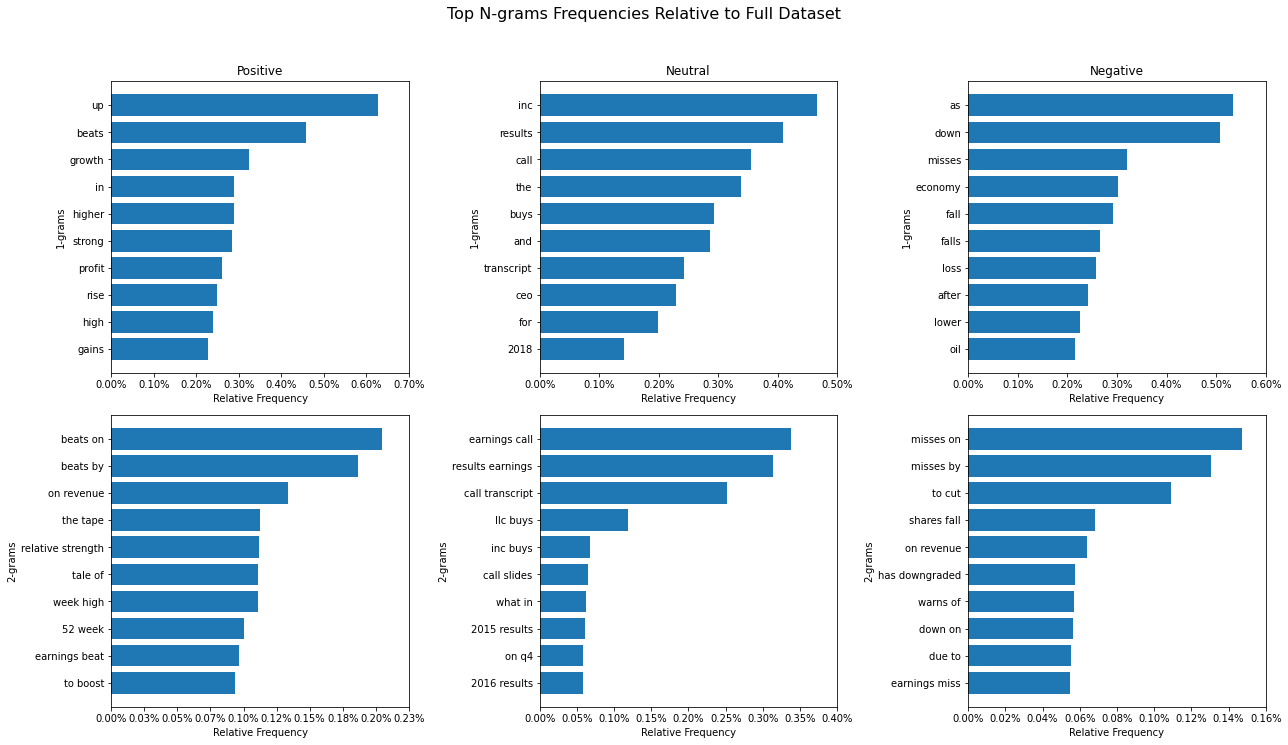

In [21]:
def plot_top_ngrams_relative(ax, corpus, total_counts, ngrams=1, top_k=10):
    """ Plot the top k n-grams relative to the total dataset for a given corpus.
    
    I.e. if 'bull' is 0.2% of the total dataset and 0.6% of the corpus, then the relative
    frequency of 'bull' is 0.6 - 0.2 = 0.4 %.
    
    Args:
        ax: A matplotlib axes object for plotting.
        corpus: A list of strings representing the text documents.
        total_counts: A dictionary containing the total counts of n-grams for all sentiments.
        ngrams: The size of the n-grams to be extracted (default: 1).
        top_k: The number of top n-grams to display (default: 10).
    """
    word_freq = get_ngrams(corpus, ngrams=ngrams, relative=True)
    relative_word_freq = [(w, f - total_counts[w]) for w, f in zip(*word_freq)]
    words_freq = sorted(relative_word_freq, key=lambda x: x[1], reverse=True)[:top_k]
    words, relative_frequencies = zip(*words_freq)

    ax.barh(words, relative_frequencies)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Frequency')
    ax.set_ylabel(f'{ngrams}-grams')
    # Set x-axis to percentage
    xticks = ax.get_xticks()
    ax.set_xticks(xticks)
    ax.set_xticklabels(['{:,.2%}'.format(x) for x in xticks])


total_1ngrams = get_ngrams(train['Headlines'], ngrams=1, relative=True)
total_1ngrams = dict(zip(*total_1ngrams))
total_2ngrams = get_ngrams(train['Headlines'], ngrams=2, relative=True)
total_2ngrams = dict(zip(*total_2ngrams))

unique_sentiments = ['Positive', 'Neutral', 'Negative']
num_sentiments = len(unique_sentiments)
fig, axes = plt.subplots(2, num_sentiments, figsize=(6 * num_sentiments, 10))

for col, sentiment in enumerate(unique_sentiments):
    headlines = train[train['Sentiment'] == sentiment]['Headlines']
    axes[0, col].set_title(sentiment)
    plot_top_ngrams_relative(axes[0, col], headlines, total_counts=total_1ngrams, ngrams=1)
    plot_top_ngrams_relative(axes[1, col], headlines, total_counts=total_2ngrams, ngrams=2)

fig.suptitle('Top N-grams Frequencies Relative to Full Dataset', fontsize=16, y=1.03)
plt.tight_layout()
plt.show()

## Key Findings

After analyzing the dataset, the following key findings have emerged:

- The dataset is somewhat balanced, with 47% neutral headlines, 28% positive and 25% negative headlines.
- The distribution of word lengths is similar between all classes, which is a positive sign for model training.
- The problem with the high frequency of `analyst blog` n-grams has been resolved.

Overall, the dataset looks very promising and is ready to be used for training models.

### Earlier Findings

<span style="color: #999999">*This section contains the findings from the previous version of the dataset.*</span>

- Duplicates should be removed in the pre-processing pipeline.
- The amount of `analyst blog` n-grams should be looked into, as they are very frequent in the dataset 
compared to any other ngrams.
- The word `stocks` is suspiciously bullish. Do some manually testing of models with fictious 
headlines like *"Stocks crashes after the President announces new lockdown"*.

Other than that, the dataset looks promising and is ready to be used for training models.